In [ ]:
pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------- ------------------------ 61.4/165.9 kB 3.4 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 871.5 kB/s eta 0:00:10
    --------------------------------------- 0.1/8.0 MB 774.0 kB/s eta 0:00:11
    --------------------------------------- 0.1/8.0 MB 774.0 kB/s eta 0:00:11
    --------------------------------------- 0.1/8.0 MB 774.0 kB/s eta 0:00:11
   - -------------------------------------- 0.2/8.0 MB 724.0 kB/s eta 0:00:11
   - -------------------------------------- 0.3/8.0 MB 744.2 kB/s eta 0:00:11
   - -------------------------------------- 0.3/8.0 MB 733.3 kB/s eta 0:00:11
   - -------------------------------------- 0.4/8.0 MB 813.8 kB/s eta 0:00:10
   --

In [5]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.9 kB 3.5 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.7 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load data
data = pd.read_csv("netflix_titles.csv")



# Display the first few rows of the dataset
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Inspect data
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [10]:
# Check for missing values
print(data.isnull().sum())

# Forward fill missing values
data.ffill(inplace=True)

# Alternatively, use backward fill
# data.bfill(inplace=True)

# Or fill with a specific value
# data.fillna(value=0, inplace=True)

# Drop rows with missing values
# data.dropna(inplace=True)

# Verify that there are no missing values left
print(data.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            1
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
show_id         0
type            0
title           0
director        0
cast            1
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [11]:
# Remove duplicates
data.drop_duplicates(inplace=True)


In [17]:
# Convert 'date_added' column to datetime with error handling
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')

# Check for any conversion issues
print(data['date_added'].isnull().sum())


88


In [19]:
# List all column names
print("Columns:", data.columns)

# Display the first few rows
print(data.head())

# If column names have extra spaces, strip them
data.columns = data.columns.str.strip()

# Verify column names again
print("Cleaned Columns:", data.columns)

# Convert the 'date_added' column to datetime
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y')

# Verify the conversion
print(data['date_added'].head())


Columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water  Kirsten Johnson   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans  Julien Leclercq   
4      s5  TV Show           Kota Factory  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   South Africa   
3  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   South Africa   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  r

In [20]:
# Convert 'release_year' to integer if it isn't already
data['release_year'] = data['release_year'].astype(int)

# Example: Create a new column for the decade
data['decade'] = (data['release_year'] // 10) * 10


In [21]:
# Count the number of shows per country
shows_per_country = data['country'].value_counts()

# Display the result
print(shows_per_country)


country
United States                                    3095
India                                            1071
United Kingdom                                    465
Japan                                             270
South Korea                                       218
                                                 ... 
Luxembourg                                          1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64


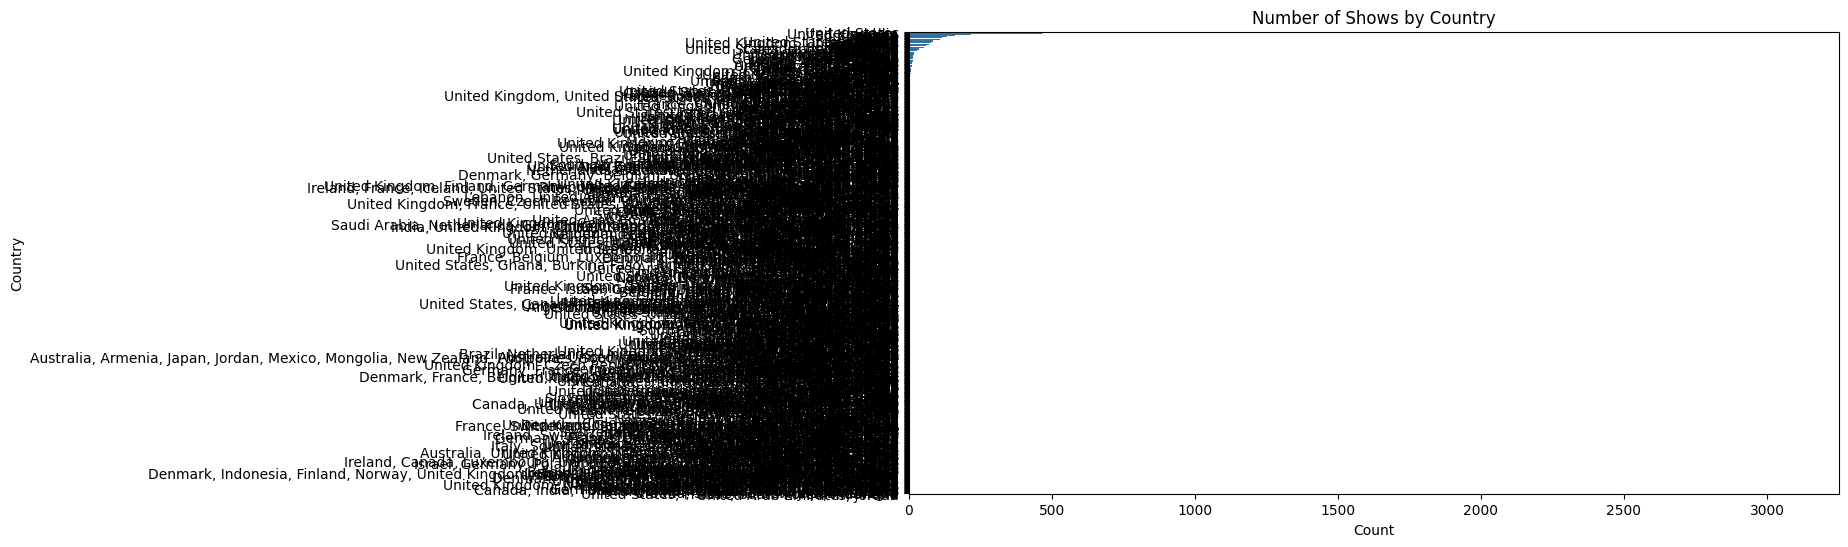

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of shows by country
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=data, order=data['country'].value_counts().index)
plt.title('Number of Shows by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


In [24]:
import sqlite3

# Step 1: Connect to SQLite Database
# 'netflix_data.db' is the name of the database file
conn = sqlite3.connect('netflix_data.db')

# Step 2: Store the DataFrame in the Database
# The table name is 'netflix_transformed'
data.to_sql('netflix_transformed', conn, if_exists='replace', index=False)

# Step 3: Close the Connection
conn.close()


In [26]:
# Reconnect to the database
conn = sqlite3.connect('netflix_data.db')

# Read data from the 'netflix_transformed' table into a DataFrame
query = 'SELECT * FROM netflix_transformed'
transformed_data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the transformed data
print(transformed_data.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water  Kirsten Johnson   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans  Julien Leclercq   
4      s5  TV Show           Kota Factory  Julien Leclercq   

                                                cast        country  \
0                                               None  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   South Africa   
3  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   South Africa   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
2  2021-09-24 00:00:00    

## Summary of Findings

- **Top Countries**: The United States has the highest number of shows available on Netflix.
- **Trends Over Time**: There has been a significant increase in the number of shows released over the years.

## Data Transformations

- **Date Conversion**: Converted the `date_added` column to a datetime format.
- **Duration Extraction**: Extracted numerical values from the `duration` column to calculate average duration.

## Visualizations

- Distribution of Shows by Country
- Number of Shows Released per Year


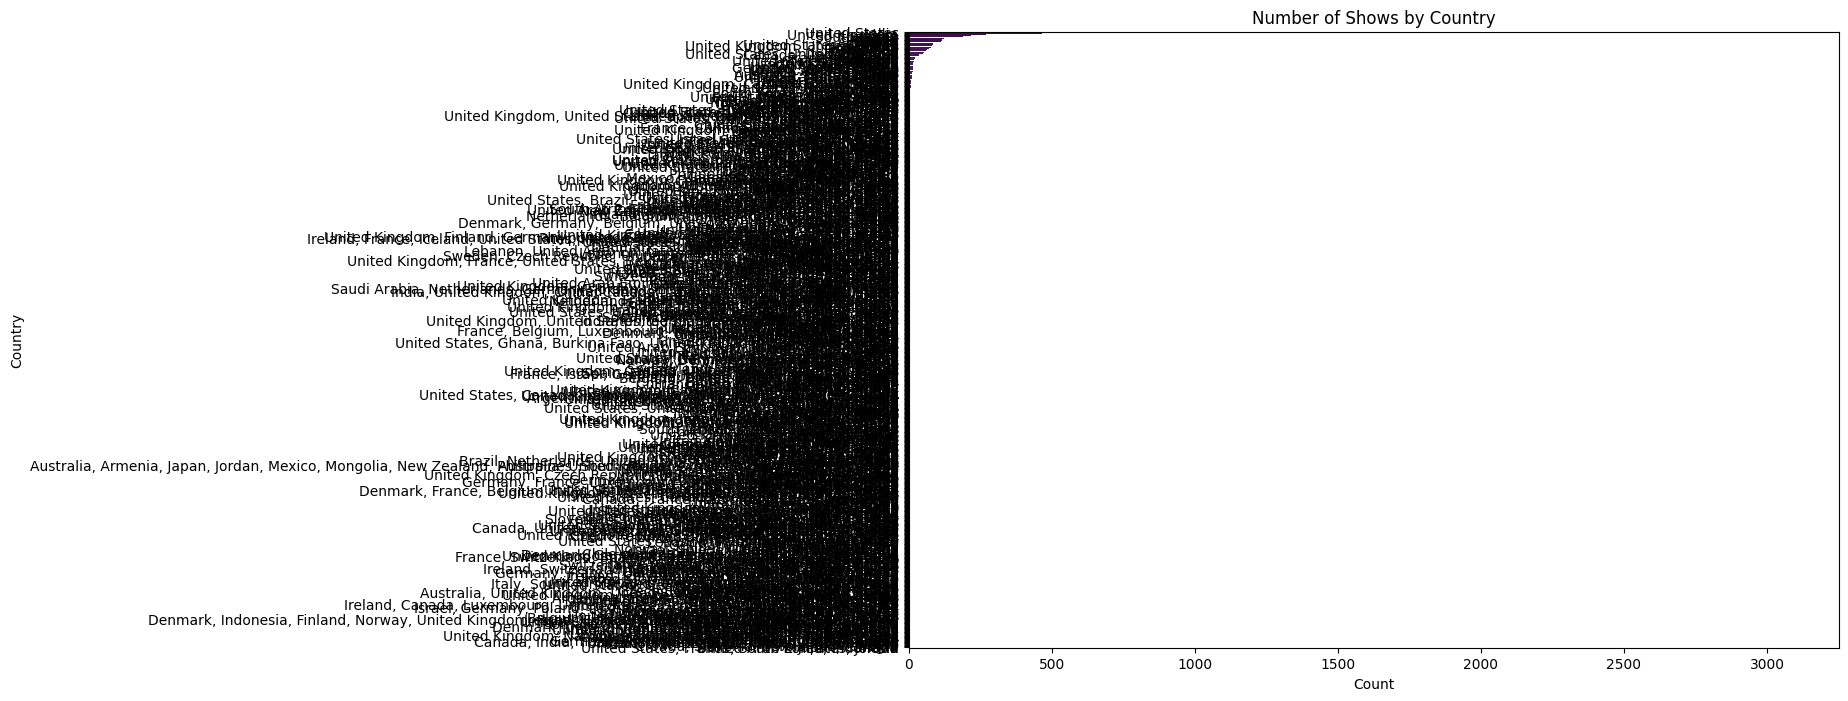

In [31]:
#Distribution of Shows by Country
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your plotting code
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of shows by country
plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=data, order=data['country'].value_counts().index, palette='viridis')
plt.title('Number of Shows by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


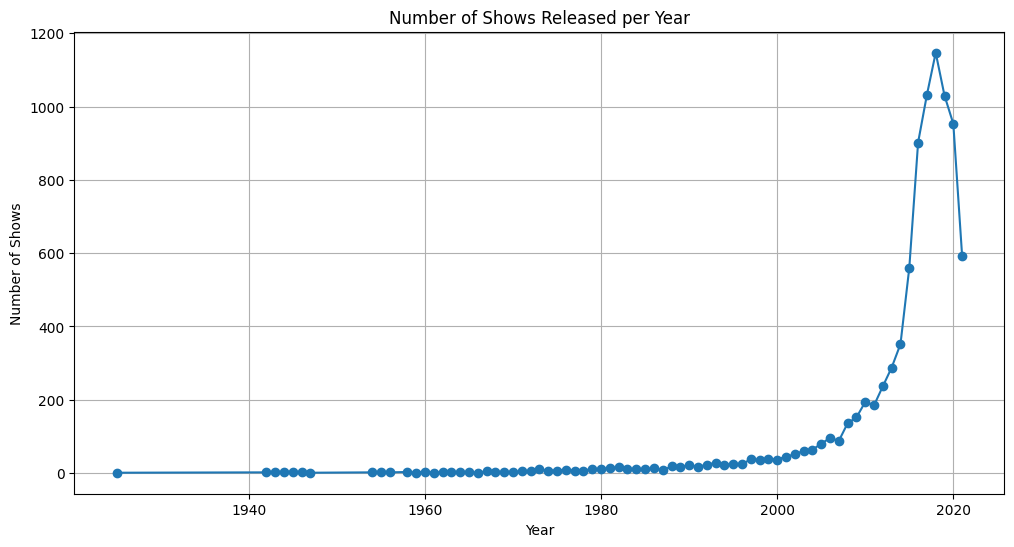

In [32]:
#Number of Shows Released per Year
# Convert 'release_year' to numeric if it isn't already
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Plot trends over time for the number of shows released each year
plt.figure(figsize=(12, 6))
data['release_year'].dropna().astype(int).value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Shows Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()
